# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
#n = number of throws
throws = []
def roll_dice(n):
    count = []
    while sum(count) <= (n-1):
        throws.append(random.randint(1,6))
        count.append(1)
    else:
        print(throws)
    

In [3]:
roll_dice(10)

[4, 1, 6, 6, 3, 4, 2, 5, 1, 4]


In [18]:
throws_df = pd.DataFrame(throws, columns={'outcome'})
throws_df

,outcome
0,4
1,1
2,6
3,6
4,3
5,4
6,2
7,5
8,1
9,4


#### 2.- Plot the results sorted by value.

In [19]:
import matplotlib

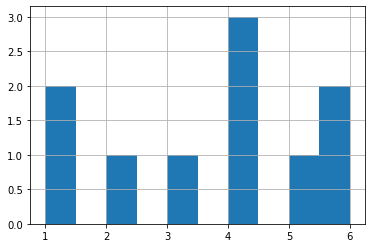

In [20]:
# your code here
throws_df.sort_values(by='outcome', ascending=False)
throws_df.outcome.hist()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [24]:
throws_df['freqency'] = [1,1,1,1,1,1,1,1,1,1]

In [27]:
freqthrows = throws_df.groupby('outcome').count()
freqthrows

,freqency
outcome,
1,2
2,1
3,1
4,3
5,1
6,2


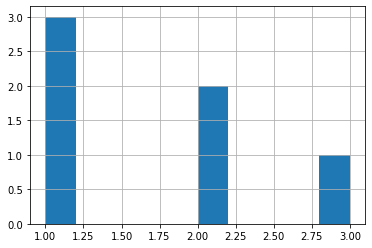

In [33]:
freqthrows.freqency.hist()

In [ ]:
"""
your comments here
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [36]:
# your code here

def mean_func(df):
    result = df.sum()/len(df)
    return result

mean_func(throws_df['outcome'])

3.6

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [37]:
# your code here
mean_func(freqthrows)


freqency    1.666667
dtype: float64

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [42]:
# your code here

def median_func(lst):
    n= len(lst)
    lst.sort_values()
    
    if n % 2 == 0:
        result = lst[((n/2)-1 + (n/2))/2]
        return result
    else:
        result = lst[n/2]
        return result

median_func(freqthrows)

TypeError: sort_values() missing 1 required positional argument: 'by'

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [ ]:
# your code here


def quanrtiles(lst):
    n= len(lst)
    lst.sort_values()
    
    if n % 2 == 0:
        q1 = lst[((n/4)-1 + (n/4))/2]
        q2 = lst[((n/2)-1 + (n/2))/2]
        q3 = q1 + q2
        return q1, q2, q3
    else:
        q1 = lst[(n+1/4)]
        q2 = lst[(n+1/2)]
        q3 = q1 + q2
        return q1, q2, q3

quanrtiles(freqthrows)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

roll     49.50
value     3.74
dtype: float64

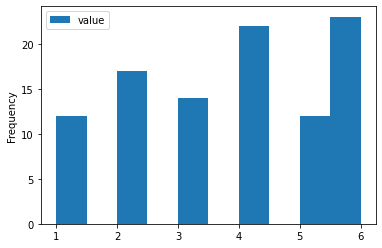

In [46]:
# your code here
roll_dice_hundred = pd.read_csv(r'../data/roll_the_dice_hundred.csv', index_col = 0)
roll_dice_hundred
roll_dice_hundred.sort_values(by = 'value').plot(x = 'roll', y = 'value', kind = 'hist')
roll_dice_hundred.mean()

In [ ]:
"""
your comments here
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [47]:
# your code here
def mean_func(df):
    result = df.sum()/len(df)
    return result

mean_func(roll_dice_hundred['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [48]:
# your code here
frequency = pd.DataFrame(roll_dice_hundred['value'].value_counts())
frequency
mean(frequency)

value    16.666667
dtype: float64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

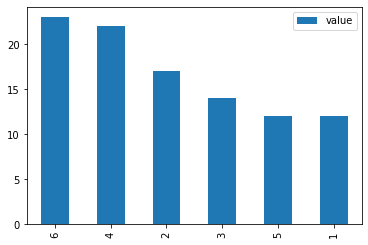

In [49]:
# your code here
frequency.plot.bar()


In [ ]:
"""
The histogram is right skewd to to a higher occurance of higher throw outcomes
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

roll     499.500
value      3.447
dtype: float64

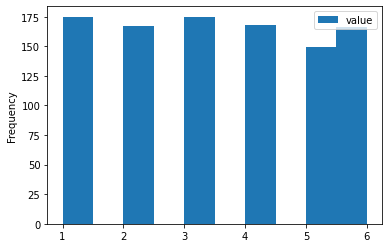

In [50]:
# your code here
roll_dice_thousand = pd.read_csv(r'../data/roll_the_dice_thousand.csv', index_col = 0)
roll_dice_thousand
roll_dice_thousand.sort_values(by = 'value').plot(x = 'roll', y = 'value', kind = 'hist')
roll_dice_thousand.mean()

In [ ]:
"""
The numbers 1 to6 appear nearly equally often due to the law of the higher number, every number is as likely as the other, the histogram flattens
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

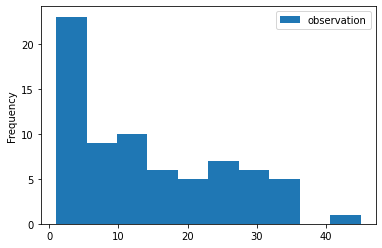

In [56]:
# your code here
ages = pd.read_csv(r'../data/ages_population.csv')
frequency = pd.DataFrame(ages['observation'].value_counts())
frequency.plot.hist()

In [ ]:
''' I assume a of about 35 with a standard deviation of about 10'''

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [53]:
# your code here
frequency.describe()

,observation
count,72.000000
mean,13.888889
std,11.261996
min,1.000000
25%,3.000000
50%,11.500000
75%,23.000000
max,45.000000


In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

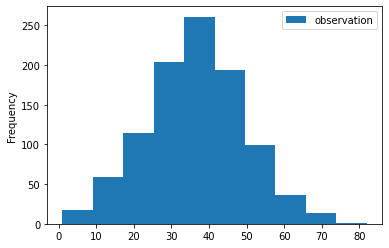

In [54]:
# your code here
ages = pd.read_csv(r'../data/ages_population.csv')
frequency = pd.DataFrame(ages['observation'].value_counts())
ages.plot.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
The distribution has the tencency of a normal distribution, the values close to the mean seam to be more common.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [55]:
# your code here
ages.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [ ]:
"""

"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

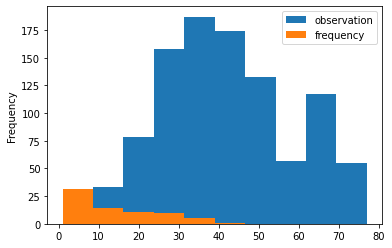

In [57]:
# your code here
ages3 = pd.read_csv(r'../data/ages_population3.csv')
ages3['frequency'] = ages['observation'].value_counts()
ages3.plot.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [59]:
# your code here
ages3.describe()

,observation,frequency
count,1000.000000,72.000000
mean,41.989000,13.888889
std,16.144706,11.261996
min,1.000000,1.000000
25%,30.000000,3.000000
50%,40.000000,11.500000
75%,53.000000,23.000000
max,77.000000,45.000000


In [ ]:
"""
The frequency is the number of values occuring at a certain value - therefore they differ
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [60]:
# your code here
ages3.describe()

,observation,frequency
count,1000.000000,72.000000
mean,41.989000,13.888889
std,16.144706,11.261996
min,1.000000,1.000000
25%,30.000000,3.000000
50%,40.000000,11.500000
75%,53.000000,23.000000
max,77.000000,45.000000


In [ ]:
"""
This illustrates that with larger samples distributions flatten
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [61]:
# your code here
frequency.quantile([0.2, 0.4, 0.6, 0.8])

,observation
0.2,2.2
0.4,8.0
0.6,15.6
0.8,24.8


In [ ]:
"""

"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""